In [16]:
# K Means on Iris Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import datasets
from sklearn.cluster import KMeans


In [3]:
iris = datasets.load_iris()

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
data = pd.DataFrame(data = iris.data, columns= iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data['class'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X = data.drop(['class'], axis =1)
y = data[['class']]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
#y.head()
y['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

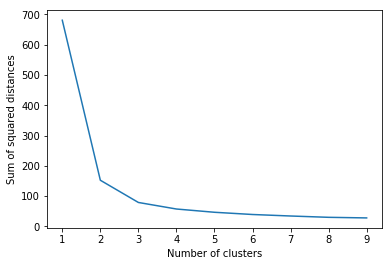

In [35]:
# Plotting a graph showing relationship between number of clusters and total squared distance and finding optimal number of clusters.

squared_dist =[] # list to store Sum of squared distances of samples to their closest cluster center

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    squared_dist.append(kmeans.inertia_)


plt.plot(range(1, 10), squared_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


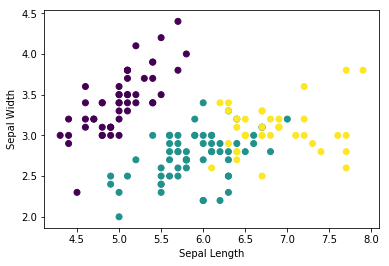

In [51]:
# According to the data there are 3 classes or clusters in which the data points fall.
# This is confirmed using the elbow heuristic from the elbow curve above.
# We can see that the elbow forms when number of clusters = 3  and then sum of squares tends to zero after that.

#Visualization of the 3 clusters based on sepal length and sepal width

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plt.figure('K-means with 3 clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=kmeans.labels_)
plt.show()